## Oriented Object Detection Challenge

In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
# Read the Data
data = pd.read_csv("C:/Users/Asus1/Downloads/Image data.csv")
data

,Image,Label
0,D:\Data Analytics\Intern\ML task\ML task datas...,Front
1,D:\Data Analytics\Intern\ML task\ML task datas...,Front
2,D:\Data Analytics\Intern\ML task\ML task datas...,Top
3,D:\Data Analytics\Intern\ML task\ML task datas...,Front
4,D:\Data Analytics\Intern\ML task\ML task datas...,Front
5,D:\Data Analytics\Intern\ML task\ML task datas...,Front
6,D:\Data Analytics\Intern\ML task\ML task datas...,Top
7,D:\Data Analytics\Intern\ML task\ML task datas...,Top
8,D:\Data Analytics\Intern\ML task\ML task datas...,Top
9,D:\Data Analytics\Intern\ML task\ML task datas...,Top


**Data Exploration**

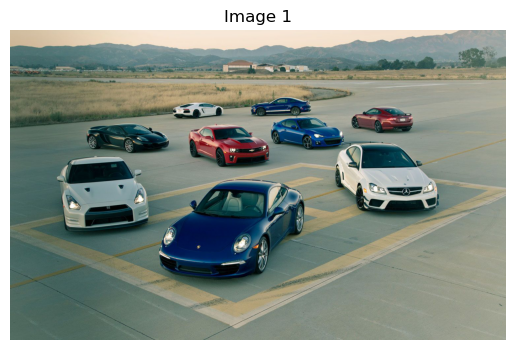

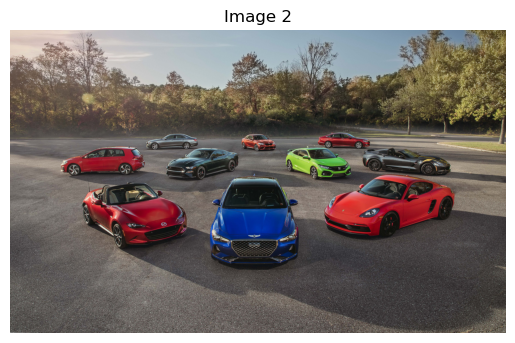

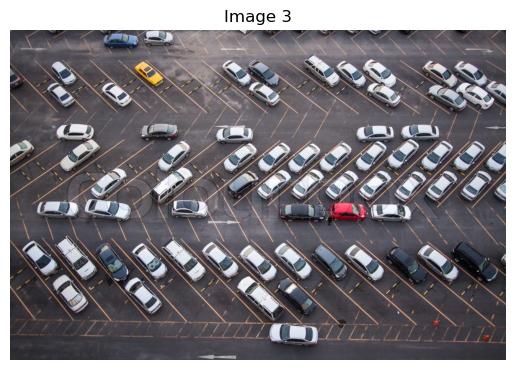

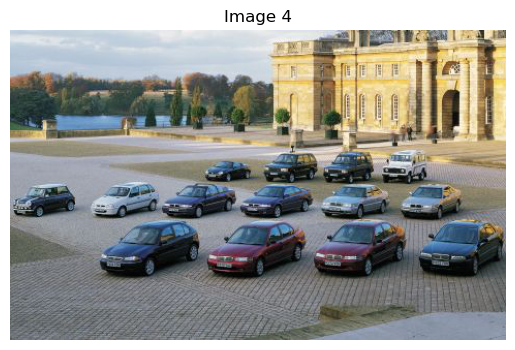

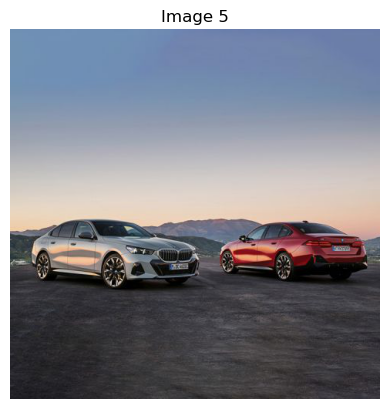

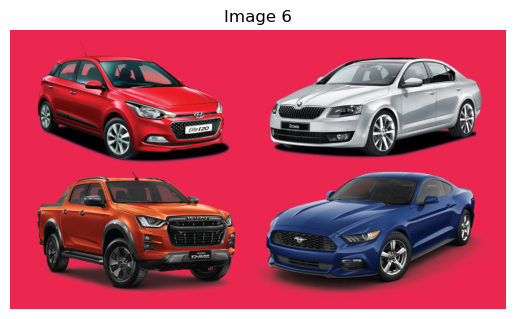

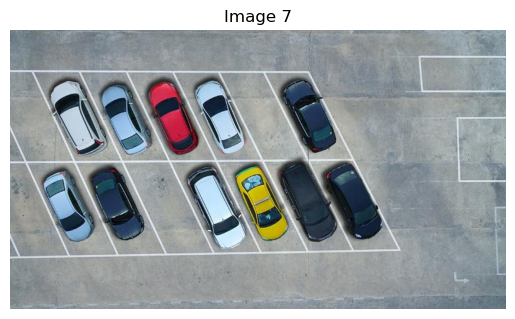

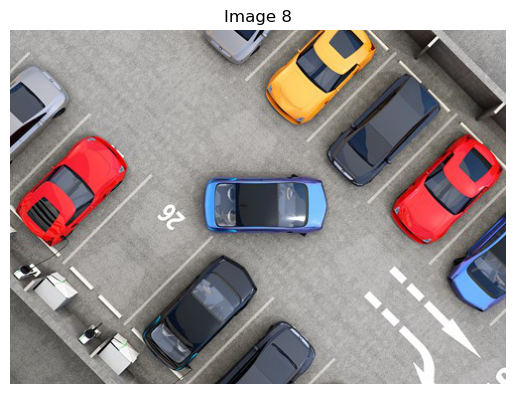

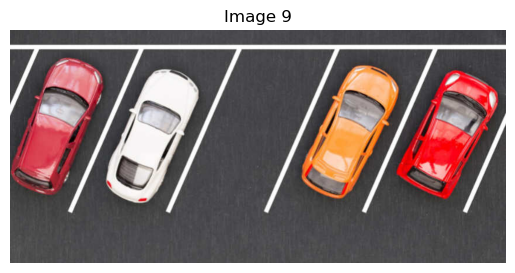

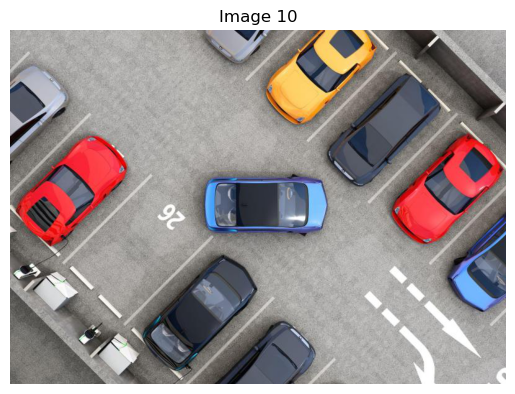

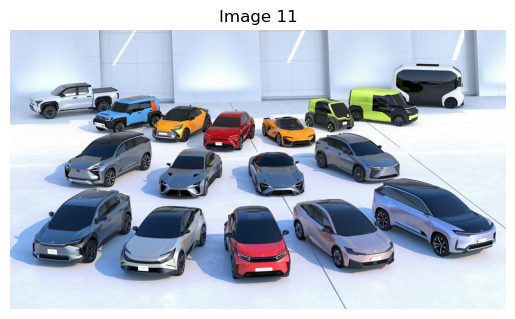

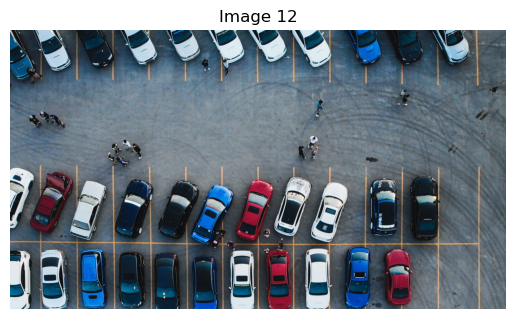

In [3]:
# Visualizing the Data
for index, row in data.iterrows():
    image_path = row['Image']
    image = plt.imread(image_path)

    # Display the image
    plt.imshow(image)
    plt.title(f"Image {index + 1}")
    plt.axis('off')  # Optionally, remove axes
    plt.show()


**Data Preprocessing**

In [4]:
def load_and_resize_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    return image

In [5]:
def normalize_image(image):
    image = image.astype('float32')
    image /= 255.0  # Normalize to [0, 1]
    return image

In [6]:
from keras.preprocessing.image import ImageDataGenerator

target_size = (224, 224)  # Adjust to your desired image size

preprocessed_images = []
for index, row in data.iterrows():
    image_path = row['Image']
    image = load_and_resize_image(image_path, target_size)
    image = normalize_image(image)
    preprocessed_images.append(image)

In [7]:
preprocessed_images = np.array(preprocessed_images)
preprocessed_images

array([[[[0.627451  , 0.74509805, 0.81960785],
         [0.627451  , 0.74509805, 0.81960785],
         [0.627451  , 0.74509805, 0.81960785],
         ...,
         [0.627451  , 0.6431373 , 0.59607846],
         [0.64705884, 0.654902  , 0.627451  ],
         [0.6431373 , 0.65882355, 0.6392157 ]],

        [[0.62352943, 0.7411765 , 0.8156863 ],
         [0.62352943, 0.7411765 , 0.8156863 ],
         [0.62352943, 0.7411765 , 0.8156863 ],
         ...,
         [0.6392157 , 0.6509804 , 0.6156863 ],
         [0.62352943, 0.63529414, 0.6       ],
         [0.6313726 , 0.64705884, 0.62352943]],

        [[0.627451  , 0.74509805, 0.81960785],
         [0.62352943, 0.7411765 , 0.8156863 ],
         [0.62352943, 0.7411765 , 0.8156863 ],
         ...,
         [0.6431373 , 0.65882355, 0.6156863 ],
         [0.6392157 , 0.654902  , 0.6117647 ],
         [0.6392157 , 0.65882355, 0.62352943]],

        ...,

        [[0.36862746, 0.4117647 , 0.30980393],
         [0.38431373, 0.42745098, 0.3254902 ]

In [8]:
# Sperating the features and target variables
target = data['Label']

In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
encoded_target= label_encoder.fit_transform(target)

print(encoded_target)

[0 0 1 0 0 0 1 1 1 1 0 1]


In [10]:
# Test-train Split
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(preprocessed_images, encoded_target, test_size=0.25)

**Model Development**

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


**Training the Model**

In [19]:
model.fit(train_images_balanced, train_labels_balanced, epochs=10, validation_split=0.3)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.7157 - accuracy: 0.5000 - val_loss: 0.9187 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 1s 561ms/step - loss: 0.1367 - accuracy: 1.0000 - val_loss: 11.3319 - val_accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 1s 603ms/step - loss: 6.2324 - accuracy: 0.5000 - val_loss: 3.4403 - val_accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 1s 565ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 9.2594 - val_accuracy: 0.6667
Epoch 5/10
1/1 [==============================] - 1s 554ms/step - loss: 6.5314 - accuracy: 0.5000 - val_loss: 7.5053 - val_accuracy: 0.6667
Epoch 6/10
1/1 [==============================] - 1s 549ms/step - loss: 2.6313 - accuracy: 0.5000 - val_loss: 3.8770 - val_accuracy: 0.6667
Epoch 7/10
1/1 [==============================] - 1s 535ms/step - loss: 8.6629e-05 - accuracy: 1.0000 - val_loss: 1.2907 - val_accuracy: 0.6667
Epoch 8/10
1/1 [==

**Evaluating the Model**

In [20]:
# Evaluate the model
score = model.evaluate(test_images, test_labels)

# Print the accuracy of the model
print("Model accuracy:", score[1]*100,"%")

1/1 [==============================] - 0s 71ms/step - loss: 1.1152 - accuracy: 0.6667
Model accuracy: 66.66666865348816 %
